In [1]:
import pandas as pd
import os

# Define the folder and file name
folder = 'Datasets'
file_name = '0202-2018-present.csv'
csv_file = os.path.join(folder, file_name)

# Define the columns you want to transform into rows, excluding "SubGrup proced" and "Total"
columns_to_transform = [f"{month}/{year}" for year in range(2018, 2024) for month in ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]]

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file, sep=';', encoding='utf-8')

# Drop the "SubGrup proced" and "Total" columns
df.drop(columns=['SubGrup proced', 'Total'], inplace=True, errors='ignore')

# Melt the DataFrame to convert columns to rows
melted_df = pd.melt(df, var_name='Month/Year', value_name='Value')

# Save the transformed data to a new CSV file
melted_df.to_csv(os.path.join(folder, 'transformed_data.csv'), index=False)


In [2]:
import pandas as pd
import os

# Define the folder and file name for the CSV file
folder = 'Datasets'
file_name_2 = '0202-2012-2017.csv'

# Generate the list of columns to transform using list comprehension
columns_to_transform = [f"{month}/{year}" for year in range(2012, 2018) for month in ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]]

# Read the columns from the CSV file
df2 = pd.read_csv(os.path.join(folder, file_name_2), usecols=columns_to_transform, sep=';', encoding='utf-8')

# Melt the DataFrame to convert columns to rows
melted_df2 = pd.melt(df2, var_name='Month/Year', value_name='Value')

# Save the transformed data to a new CSV file
melted_df2.to_csv(os.path.join(folder, 'transformed_data_2012_2017.csv'), index=False)

In [5]:
import pandas as pd

# Read both CSV files into DataFrames
df_2012_2017 = pd.read_csv('Datasets/transformed_data_2012_2017.csv')
df_2018_2023 = pd.read_csv('Datasets/transformed_data_2018_2023.csv')

# Concatenate the two DataFrames vertically (along rows)
combined_df = pd.concat([df_2012_2017, df_2018_2023], ignore_index=True)

# Remove duplicates based on all columns
combined_df = combined_df.drop_duplicates()

# Save the merged data to a new CSV file as "diagnose_2012_2023.csv"
combined_df.to_csv('Datasets/diagnose_2012_2023.csv', index=False)

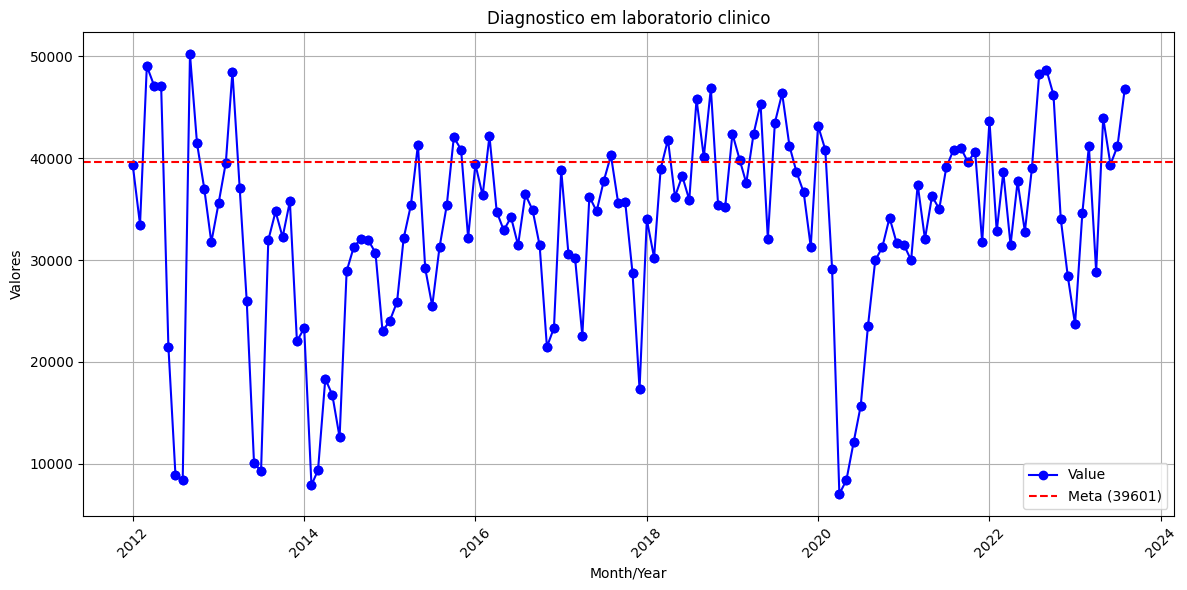

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'merged_data.csv'

# Read the merged data into a DataFrame
merged_data = pd.read_csv(os.path.join(folder, file_name))

# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
merged_data['Month/Year'] = merged_data['Month/Year'].replace(month_mapping, regex=True)
merged_data['Month/Year'] = pd.to_datetime(merged_data['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
merged_data = merged_data.sort_values(by='Month/Year')

# Extract the x (dates) and y (values) values for the line plot
x = merged_data['Month/Year']
y = merged_data['Value']

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.axhline(y=39601, color='r', linestyle='--', label='Meta (39601)')  # Add a red dashed line for the goal
plt.xlabel('Month/Year')
plt.ylabel('Valores')
plt.title('Diagnostico em laboratorio clinico')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()


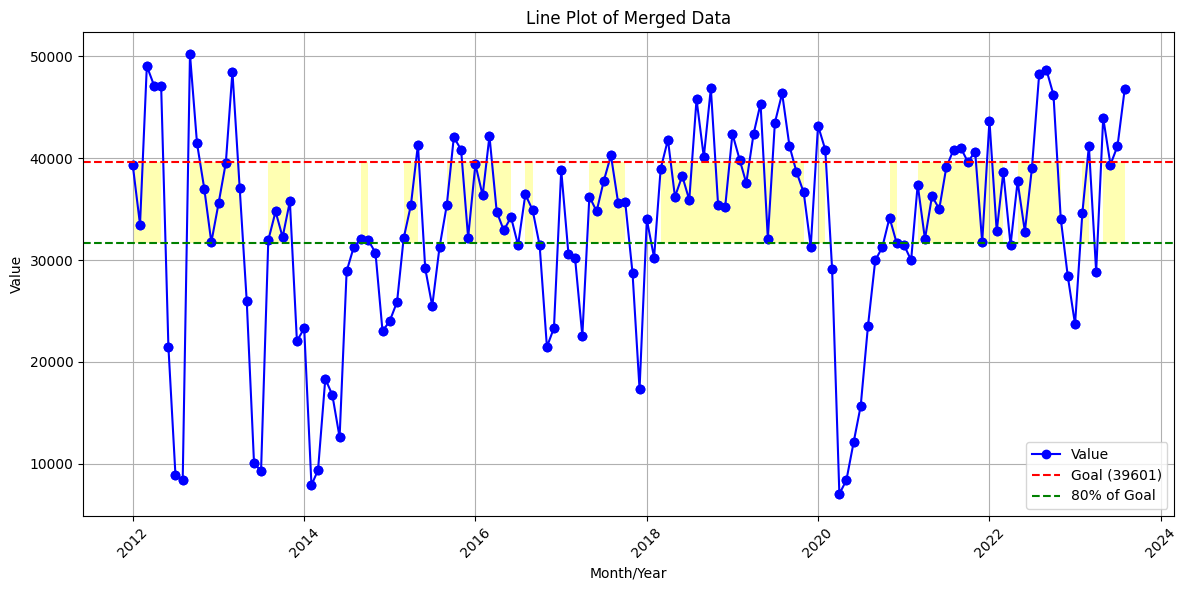

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'merged_data.csv'

# Read the merged data into a DataFrame
merged_data = pd.read_csv(os.path.join(folder, file_name))

# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
merged_data['Month/Year'] = merged_data['Month/Year'].replace(month_mapping, regex=True)
merged_data['Month/Year'] = pd.to_datetime(merged_data['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
merged_data = merged_data.sort_values(by='Month/Year')

# Extract the x (dates) and y (values) values for the line plot
x = merged_data['Month/Year']
y = merged_data['Value']

# Calculate the 80% of the goal value
goal = 39601
eighty_percent_of_goal = 0.8 * goal

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.axhline(y=goal, color='r', linestyle='--', label='Goal (39601)')  # Add a red dashed line for the goal
plt.axhline(y=eighty_percent_of_goal, color='g', linestyle='--', label='80% of Goal')  # Add a green dashed line for 80% of the goal
plt.fill_between(x, eighty_percent_of_goal, goal, where=(y >= eighty_percent_of_goal), facecolor='yellow', alpha=0.3)  # Shade the area between the lines
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Line Plot of Merged Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()


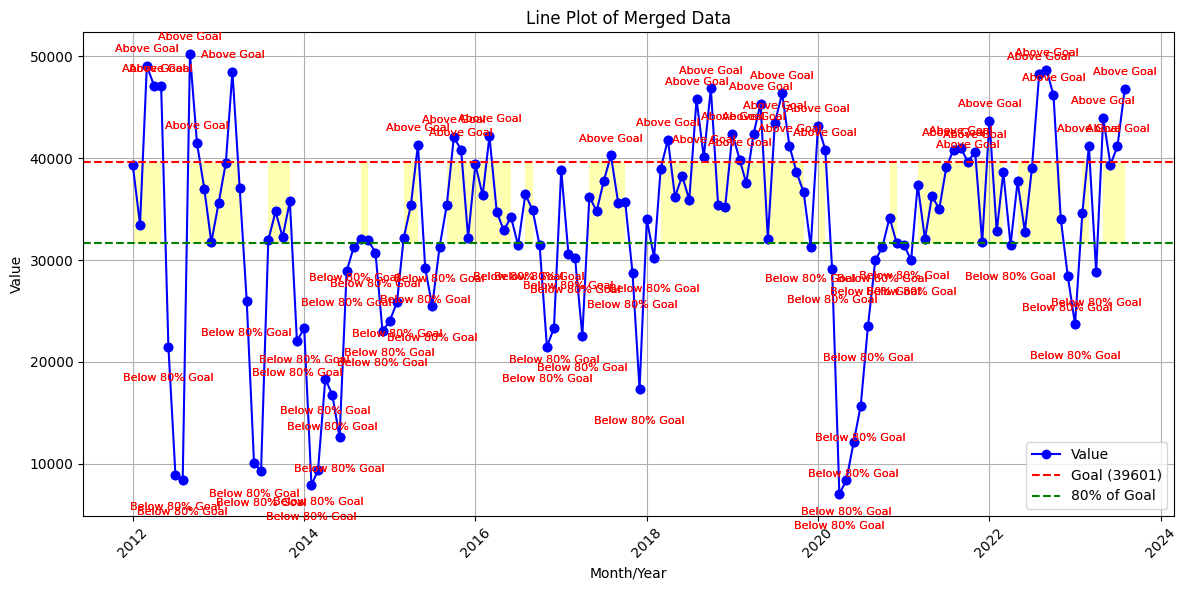

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'merged_data.csv'

# Read the merged data into a DataFrame
merged_data = pd.read_csv(os.path.join(folder, file_name))

# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
merged_data['Month/Year'] = merged_data['Month/Year'].replace(month_mapping, regex=True)
merged_data['Month/Year'] = pd.to_datetime(merged_data['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
merged_data = merged_data.sort_values(by='Month/Year')

# Extract the x (dates) and y (values) values for the line plot
x = merged_data['Month/Year']
y = merged_data['Value']

# Calculate the 80% of the goal value
goal = 39601
eighty_percent_of_goal = 0.8 * goal

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.axhline(y=goal, color='r', linestyle='--', label='Goal (39601)')  # Add a red dashed line for the goal
plt.axhline(y=eighty_percent_of_goal, color='g', linestyle='--', label='80% of Goal')  # Add a green dashed line for 80% of the goal
plt.fill_between(x, eighty_percent_of_goal, goal, where=(y >= eighty_percent_of_goal), facecolor='yellow', alpha=0.3)  # Shade the area between the lines
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Line Plot of Merged Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Annotate points outside the shaded area
for i in range(len(x)):
    if y[i] > goal:
        plt.annotate('Above Goal', (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')
    elif y[i] < eighty_percent_of_goal:
        plt.annotate('Below 80% Goal', (x[i], y[i]), textcoords="offset points", xytext=(0, -25), ha='center', fontsize=8, color='red')

plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()


Months below 80% of the goal:
Jun 2012
Jul 2012
Aug 2012
May 2013
Jun 2013
Jul 2013
Dec 2013
Jan 2014
Feb 2014
Mar 2014
Apr 2014
May 2014
Jun 2014
Jul 2014
Aug 2014
Nov 2014
Dec 2014
Jan 2015
Feb 2015
Jun 2015
Jul 2015
Aug 2015
Jul 2016
Oct 2016
Nov 2016
Dec 2016
Feb 2017
Mar 2017
Apr 2017
Nov 2017
Dec 2017
Feb 2018
Dec 2019
Mar 2020
Apr 2020
May 2020
Jun 2020
Jul 2020
Aug 2020
Sep 2020
Oct 2020
Jan 2021
Feb 2021
Apr 2022
Dec 2022
Jan 2023
Apr 2023


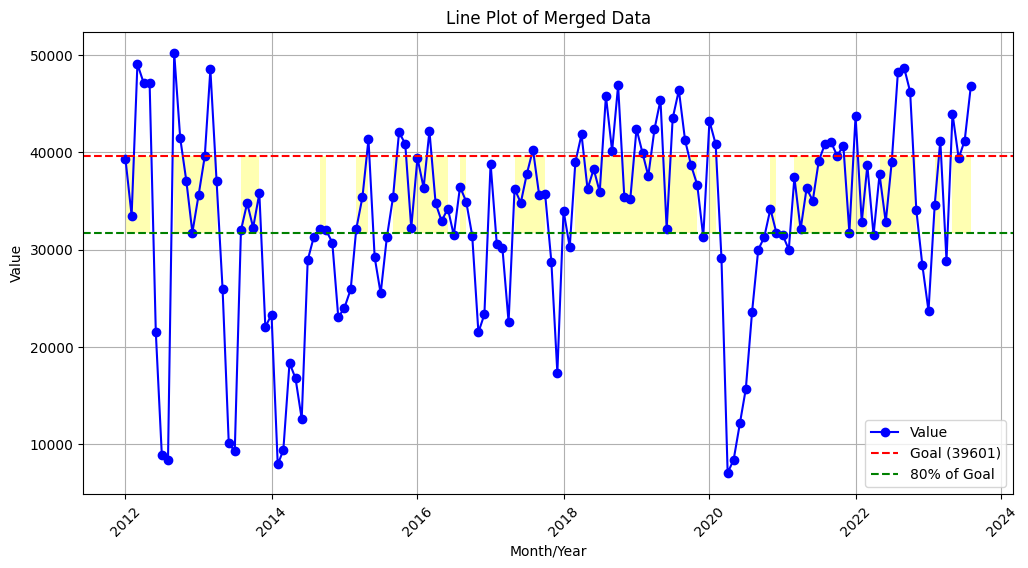

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'merged_data.csv'

# Read the merged data into a DataFrame
merged_data = pd.read_csv(os.path.join(folder, file_name))

# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
merged_data['Month/Year'] = merged_data['Month/Year'].replace(month_mapping, regex=True)
merged_data = merged_data.drop_duplicates(subset=['Month/Year'])
merged_data['Month/Year'] = pd.to_datetime(merged_data['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
merged_data = merged_data.sort_values(by='Month/Year')

# Extract the x (dates) and y (values) values for the line plot
x = merged_data['Month/Year']
y = merged_data['Value']

# Calculate the 80% of the goal value
goal = 39601
eighty_percent_of_goal = 0.8 * goal

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.axhline(y=goal, color='r', linestyle='--', label='Goal (39601)')  # Add a red dashed line for the goal
plt.axhline(y=eighty_percent_of_goal, color='g', linestyle='--', label='80% of Goal')  # Add a green dashed line for 80% of the goal
plt.fill_between(x, eighty_percent_of_goal, goal, where=(y >= eighty_percent_of_goal), facecolor='yellow', alpha=0.3)  # Shade the area between the lines
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Line Plot of Merged Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Identify and print months below the shaded area
months_below_area = [date.strftime('%b %Y') for date, value in zip(x, y) if value < eighty_percent_of_goal]
print("Months below 80% of the goal:")
for month in months_below_area:
    print(month)

plt.grid(True)
plt.legend()

# Show the plot
#plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()


Months above the goal:
Mar 2012
Apr 2012
May 2012
Sep 2012
Oct 2012
Mar 2013
May 2015
Oct 2015
Nov 2015
Mar 2016
Aug 2017
Apr 2018
Aug 2018
Sep 2018
Oct 2018
Jan 2019
Feb 2019
Apr 2019
May 2019
Jul 2019
Aug 2019
Sep 2019
Jan 2020
Feb 2020
Aug 2021
Sep 2021
Oct 2021
Nov 2021
Jan 2022
Aug 2022
Sep 2022
Oct 2022
Mar 2023
May 2023
Jul 2023
Aug 2023


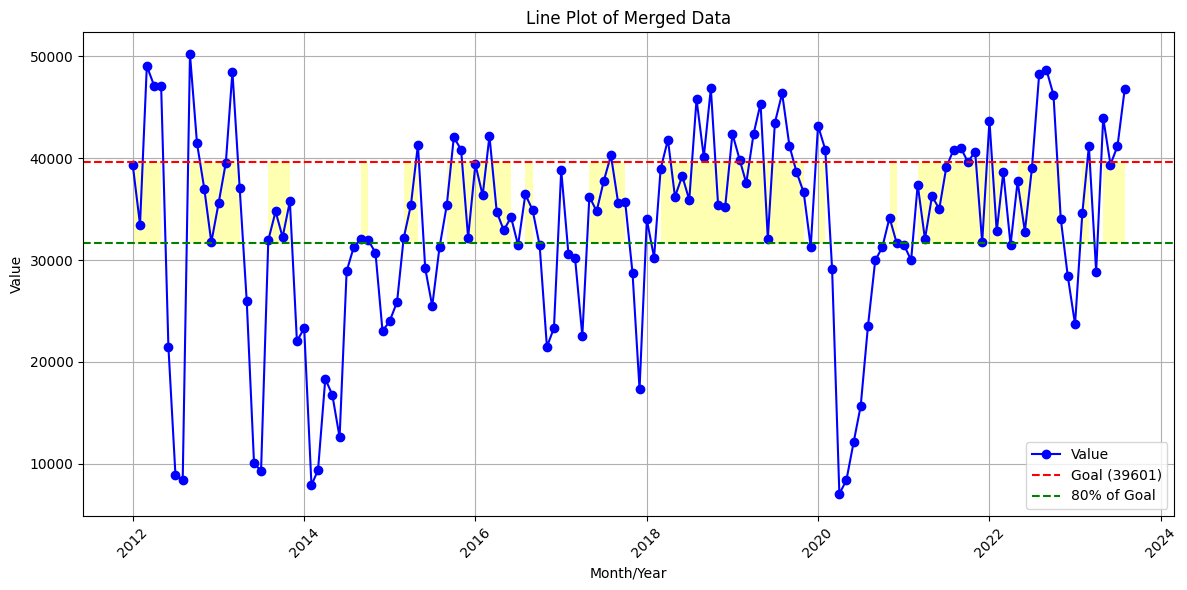

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'merged_data.csv'

# Read the merged data into a DataFrame
merged_data = pd.read_csv(os.path.join(folder, file_name))

# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
merged_data['Month/Year'] = merged_data['Month/Year'].replace(month_mapping, regex=True)
merged_data = merged_data.drop_duplicates(subset=['Month/Year'])
merged_data['Month/Year'] = pd.to_datetime(merged_data['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
merged_data = merged_data.sort_values(by='Month/Year')

# Extract the x (dates) and y (values) values for the line plot
x = merged_data['Month/Year']
y = merged_data['Value']

# Calculate the goal value
goal = 39601
eighty_percent_of_goal = 0.8 * goal

# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.axhline(y=goal, color='r', linestyle='--', label='Goal (39601)')  # Add a red dashed line for the goal
plt.axhline(y=eighty_percent_of_goal, color='g', linestyle='--', label='80% of Goal')  # Add a green dashed line for 80% of the goal
plt.fill_between(x, eighty_percent_of_goal, goal, where=(y >= eighty_percent_of_goal), facecolor='yellow', alpha=0.3)  # Shade the area between the lines
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Line Plot of Merged Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Identify and print months above the goal
months_above_goal = [date.strftime('%b %Y') for date, value in zip(x, y) if value > goal]
print("Months above the goal:")
for month in months_above_goal:
    print(month)

plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()
